Ashley Brown 801055033 11/3/2022
Homework 4

In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split. We will also use US Housing dataset with  80% and 20% split between training and evaluation (test) sets.

In [1]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

from scipy import stats
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error

Problem 1 (50pts):

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

Identify the optimum number of K, principal components that achieve the highest classification accuracy. 
Plot your classification accuracy, precision, and recall over a different number of Ks. 
Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
Compare your results against the logistic regression that you have done in homework 3.

In [2]:
#model chosen:
model = 'rbf'
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable

#repeat of hw3 stuff but with svm as the classifier
#have to put cancer data into a data frame
breast = load_breast_cancer()

#load dataset
breast = load_breast_cancer() 
breast_data = breast.data 
breast_input = pd.DataFrame(breast_data)

X = breast_data
Y = breast.target

#standardize data before splitting
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [3]:
#storage variables:
accuracy = []
precision = []
recall = []
avg = 0

#big loop
for k in range(1, 31):
  #perform PCA
  pca = PCA(n_components=k)
  pcaX = pca.fit_transform(X)

  #split dataset using pca X
  xTrain, xTest, yTrain, yTest = train_test_split(pcaX, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

  #perform log reg training on PCA data
  classifier = SVC(kernel = model, class_weight='balanced', C= 10)
  #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable
  classifier.fit(xTrain, yTrain)

  #prediction function
  yPred = classifier.predict(xTest)

  #get confusion matrix values
  cmatrix = confusion_matrix(yTest, yPred)

  #store values in array.
  accuracyTemp = metrics.accuracy_score(yTest, yPred)
  precisionTemp = metrics.precision_score(yTest, yPred) 
  recallTemp = metrics.recall_score(yTest, yPred) 

  accuracy.append(accuracyTemp)
  precision.append(precisionTemp)
  recall.append(recallTemp)

  #if best accuracy/precision/recall values so far, store index
  new = (accuracyTemp + precisionTemp + recallTemp)/3
  if avg < new:
    avg = new
    index = k

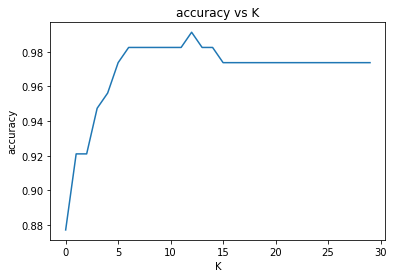

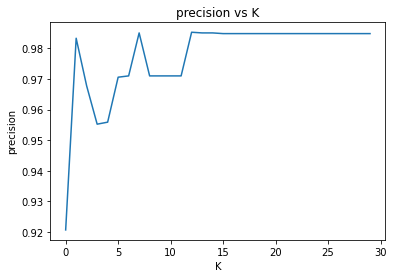

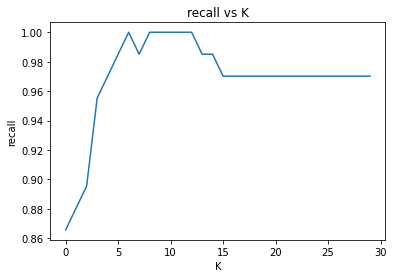

In [4]:
#plot final values
plt.plot(accuracy)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('accuracy vs K')
plt.show()

plt.plot(precision)
plt.xlabel('K')
plt.ylabel('precision')
plt.title('precision vs K')
plt.show()

plt.plot(recall)
plt.xlabel('K')
plt.ylabel('recall')
plt.title('recall vs K')
plt.show()

On the graph, you can visually see some peaks. The highest peak was stored and the training is performed in the code below:

In [5]:
#highest k value:
#perform PCA
pca = PCA(n_components=index)
pcaX = pca.fit_transform(X)

#split dataset using pca X
xTrain, xTest, yTrain, yTest = train_test_split(pcaX, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

#train using same model as before
classifier.fit(xTrain, yTrain)

#prediction function
yPred = classifier.predict(xTest)

#get confusion matrix values
cmatrix = confusion_matrix(yTest, yPred)

#print metrics etc.
print("This is the model with the highest average accuracy/precision/recall for",model,":")
print("K =",index)
print("accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("precision =",metrics.precision_score(yTest, yPred)) 
print("recall = ",metrics.recall_score(yTest, yPred)) 
print("classification report: \n",metrics.classification_report(yTest, yPred)) 
print("confusion matrix: \n",metrics.confusion_matrix(yTest, yPred))

This is the model with the highest average accuracy/precision/recall for rbf :
K = 13
accuracy = 0.9912280701754386
precision = 0.9852941176470589
recall =  1.0
classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.99      1.00      0.99        67

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

confusion matrix: 
 [[46  1]
 [ 0 67]]


The classifier was changed manually to change kernel tricks, otherwise the code would be exceptionally long, slow, and repetitive.

Problem 2 (50pts):

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Plot your regression model for SVR similar to the sample code provided on Canvas.
Compare your results against linear regression with regularization loss that you already did in homework1. 
Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy. 
Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

In [6]:
#model chosen:
model = 'rbf'
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’

#code from hw1 mostly:
#configure data sets
data_set = '/content/drive/MyDrive/IntroToMachineLearning/Housing.csv'
df2 = pd.read_csv(data_set)
dfstand = pd.DataFrame(df2)
#print(dfstand.shape)

#map function definition:
def binarymap(x):
  return x.map({"yes": 1, "no": 0}) #dont need to use furnished ever so dont bother changing it

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
#convert yesses and nos to 1 or 0
maplist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
dfstand[maplist] = dfstand[maplist].apply(binarymap)

#standardize
scaler = StandardScaler()
dfstand[varlist] = scaler.fit_transform(dfstand[varlist])

#set inputs and outputs
#stand_input = dfstand[varlist]
Y = dfstand.loc[:, dfstand.columns == 'price']
Y = Y.to_numpy()
Y = Y.flatten()
YSeries = pd.Series(Y)

#concat ones vector
X = dfstand[varlist]
#print(X.shape)
#print(YSeries.shape)

In [7]:
#storage variables:
Train = []
Pred = []
Test = []
R2 = 0

#big loop
for k in range(1, 11):
  #perform PCA
  pca = PCA(n_components=k)
  pcaX = pca.fit_transform(X)

  #fix values
  pcaDF = pd.DataFrame(data = pcaX, columns = [*range(1,k+1)]) 
  combinedDF = pd.concat([pcaDF, YSeries], axis = 1)
  outcome = combinedDF.pop(1)
  
  #final X and Y values
  X2 = combinedDF.values
  Y2 = outcome.values

  #split dataset using pca X
  xTrain, xTest, yTrain, yTest = train_test_split(X2, Y2, train_size = 0.8, test_size = 0.2, random_state = 0)

  #perform log reg training on PCA data
  classifier = SVR(kernel = model)

  classifier.fit(xTrain, yTrain)

  #prediction function
  yPred = classifier.predict(xTest)

  #store values in array.
  classifierR2= classifier.score(xTrain, yTrain)
  R2Pred = r2_score(yTest, yPred)
  R2Test = classifier.score(xTest, yTest)

  Test.append(R2Test)
  Train.append(classifierR2)
  Pred.append(R2Pred)

  #if best accuracy/precision/recall values so far, store index
  if R2 < classifierR2: 
    R2 = classifierR2
    index = k

Text(0.5, 1.0, 'r2 vs k value for prediction')

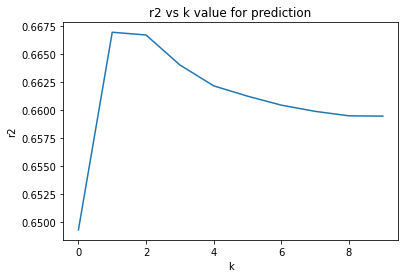

In [8]:
#accuracy plot
plt.plot(Pred)
plt.xlabel('k')
plt.ylabel('r2')
plt.title('r2 vs k value for prediction')

On the graph, you can visually see some peaks. The highest peak was stored and the training is performed in the code below:

In [9]:
#highest k value:
#perform PCA
pca = PCA(n_components=index)
pcaX = pca.fit_transform(X)
pcaDF = pd.DataFrame(data = pcaX, columns = [*range(1,index+1)]) 
combinedDF = pd.concat([pcaDF, YSeries], axis = 1)
outcome = combinedDF.pop(1)
  
#final X and Y values
X2 = combinedDF.values
Y2 = outcome.values

#split dataset using pca X
xTrain, xTest, yTrain, yTest = train_test_split(X2, Y2, train_size = 0.8, test_size = 0.2, random_state = 0)

#perform log reg training on PCA data
classifier = SVR(kernel = 'rbf')

classifier.fit(xTrain, yTrain)

#prediction function
yPred = classifier.predict(xTest)

#print metrics etc.
print("This is the model with the highest r2 metrics for",model,":")
print("K =",index)
print("r2 for pred:",r2_score(yTest, yPred))

This is the model with the highest r2 metrics for rbf :
K = 1
r2 for pred: 0.6493384105228814


The classifier was changed manually to change kernel tricks, otherwise the code would be exceptionally long, slow, and repetitive.

Text(0.5, 1.0, 'SVR Loss')

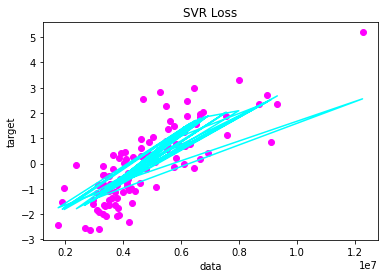

In [10]:
#problem 2 part 1, svr loss model: (broken, not sure what I did wrong)
plt.plot(xTest,yPred,color='cyan',label='rbf model')
plt.scatter(xTest,yTest,color='magenta',label='data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR Loss')